In [12]:
import glob 
import json

In [13]:
import pandas as pd

In [14]:
results_json = glob.glob("**.json")
results_json

['results_CTM.json',
 'results_CTM_scientific.json',
 'results_DTM.json',
 'results_DTM_scientific.json',
 'results_GMM.json',
 'results_GMM_large.json',
 'results_GMM_large_scientific.json',
 'results_GMM_science.json',
 'results_GMM_scientific.json',
 'results_GMM_scientific_small.json',
 'results_GMM_scientific_tfidftopic.json',
 'results_GMM_small.json',
 'results_GMM_tfidftopic.json',
 'results_KM.json',
 'results_KM_large.json',
 'results_KM_large_scientific.json',
 'results_KM_scientific.json',
 'results_KM_scientific_tfidftopic.json',
 'results_KM_tfidftopic.json',
 'results_LDA.json',
 'results_LDA_scientific.json',
 'results_tf_idf_GMM.json',
 'results_tf_idf_GMM_science.json',
 'results_tf_idf_GMM_scientific_tfidftopic.json',
 'results_tf_idf_GMM_tfidftopic.json',
 'results_tf_idf_KM.json',
 'results_tf_idf_KM_science.json',
 'results_tf_idf_KM_scientific_tfidftopic.json',
 'results_tf_idf_KM_tfidftopic.json']

In [15]:
stacked_results= list()
for filename in results_json:
    data = dict()
    with open(filename,'r') as r:
        data = json.load(r)
    data["experiment"] = filename.replace(".json","")
    stacked_results.append(data)
len(stacked_results)

29

In [16]:
import pandas as pd
stacked_results = pd.DataFrame(stacked_results)

In [17]:
stacked_results["dataset_length"] = stacked_results["dataset_length"].astype(str)
stacked_results["average_document_length"] = stacked_results["average_document_length"].astype(str)
stacked_results["vocab_size"] = stacked_results["vocab_size"].astype(str)
stacked_results["topic_method"] =  stacked_results["topic_method"].fillna("tf")
stacked_results.loc[stacked_results.embedding_method == "Pre-trained embeddings","embedding_model"] = stacked_results.loc[
    stacked_results.embedding_method == "Pre-trained embeddings"]["embedding_model"].fillna("paraphrase-multilingual-MiniLM-L12-v2")
stacked_results["embedding_model"] = stacked_results["embedding_model"].fillna("tfidf")

In [18]:
small_data = stacked_results.loc[(stacked_results.experiment.str.contains("small"))]
small_data.to_excel("Small_data_results.xlsx",index=False)

<ipython-input-18-9c1e490eaa19>:2: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  small_data.to_excel("Small_data_results.xlsx",index=False)


In [11]:
stacked_results.loc[stacked_results.training_time.notna()]

,coherence,top_tokens,spanish_coherence,spanish_top_tokens,diversity,spanish_diversity,average_matching,cla,dataset,embedding_method,model,topic_method,dataset_length,average_document_length,vocab_size,training_time,experiment,embedding_model
4,0.083183,"[[european, group, party, include, mep, irish,...",0.061077,"[[grupo, europeo, partido, nombre, democrata, ...",0.54,0.425,1.0,0.318859,UN_100w,Pre-trained embeddings,GMM,tf,19816,54.0,3996,805.714168,results_GMM_scientific,paraphrase-multilingual-MiniLM-L12-v2


In [9]:
stacked_results = stacked_results.loc[ ~(stacked_results.experiment.isin(small_data.experiment))].reset_index(drop=True)
stacked_results

,coherence,top_tokens,spanish_coherence,spanish_top_tokens,diversity,spanish_diversity,average_matching,cla,dataset,embedding_method,model,topic_method,dataset_length,average_document_length,vocab_size,training_time,experiment,embedding_model
0,0.083539,"[[european, group, party, include, mep, irish,...",0.061851,"[[grupo, europeo, partido, nombre, democrata, ...",0.540,0.425,1.000000,0.318859,UN_100w,Pre-trained embeddings,GMM,tf,19816,54.0,3996,NaN,results_GMM,paraphrase-multilingual-MiniLM-L12-v2
1,0.073583,"[[group, european, party, behalf, include, mep...",0.059810,"[[grupo, europeo, nombre, partido, democrata, ...",0.515,0.430,1.000000,0.322444,UN_100w,Pre-trained embeddings,GMM,tf,19816,54.0,3996,NaN,results_GMM_large,paraphrase-multilingual-mpnet-base-v2
2,0.075065,"[[pain, block, anesthesia, postoperative, surg...",0.068963,"[[dolor, bloqueo, anestesia, postoperatorio, d...",0.680,0.685,1.000000,0.150289,scientific_papers,Pre-trained embeddings,GMM,tf,995,1006.0,47620,NaN,results_GMM_large_scientific,paraphrase-multilingual-mpnet-base-v2
3,0.091610,"[[pain, block, postoperative, surgery, cathete...",0.085146,"[[dolor, bloqueo, postoperatorio, anestesico, ...",0.640,0.655,1.000000,0.152296,scientific_papers,Pre-trained embeddings,GMM,tf,995,1006.0,47620,NaN,results_GMM_science,paraphrase-multilingual-MiniLM-L12-v2
4,0.083183,"[[european, group, party, include, mep, irish,...",0.061077,"[[grupo, europeo, partido, nombre, democrata, ...",0.540,0.425,1.000000,0.318859,UN_100w,Pre-trained embeddings,GMM,tf,19816,54.0,3996,805.714168,results_GMM_scientific,paraphrase-multilingual-MiniLM-L12-v2
5,0.054642,"[[min, anesthesia, anesthetic, dose, catheter,...",0.056100,"[[cirugia, local, anestesia, cateter, anestesi...",0.700,0.650,1.000000,0.152296,scientific_papers,Pre-trained embeddings,GMM,tfidf,995,1006.0,47620,NaN,results_GMM_scientific_tfidftopic,paraphrase-multilingual-MiniLM-L12-v2
6,0.092911,"[[member, independent, british, party, irish, ...",0.069176,"[[diputado, parlamento, verde, izquierda, euro...",0.595,0.460,1.000000,0.318859,UN_100w,Pre-trained embeddings,GMM,tfidf,19816,54.0,3996,NaN,results_GMM_tfidftopic,paraphrase-multilingual-MiniLM-L12-v2
7,0.081882,"[[judge, law, university, court, european, gen...",0.058129,"[[juez, derecho, tribunal, general, universida...",0.535,0.400,1.000000,0.336391,UN_100w,Pre-trained embeddings,KM,tf,19816,54.0,3996,NaN,results_KM,paraphrase-multilingual-MiniLM-L12-v2
8,0.067199,"[[benefit, pension, family, allowance, sicknes...",0.040429,"[[prestación, subsidio, enfermedad, país, asoc...",0.510,0.390,1.000000,0.348717,UN_100w,Pre-trained embeddings,KM,tf,19816,54.0,3996,NaN,results_KM_large,paraphrase-multilingual-mpnet-base-v2
9,0.058560,"[[alcohol, consumption, suicide, behavior, stu...",0.061624,"[[consumo, alcohol, suicidio, enfermeria, pers...",0.660,0.675,1.000000,0.159896,scientific_papers,Pre-trained embeddings,KM,tf,995,1006.0,47620,NaN,results_KM_large_scientific,paraphrase-multilingual-mpnet-base-v2


In [10]:
stacked_results.to_excel("stacked_result_table.xlsx",index=False)

<ipython-input-10-a78068d2c8c4>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  stacked_results.to_excel("stacked_result_table.xlsx",index=False)


## Coherence

In [24]:
import seaborn as sns
from matplotlib import pyplot as plt
def bargraph_dimension_value(data,dimension,val):
    sns.barplot(data=data,x=dimension,y=val)
    plt.xticks(rotation=45)
    plt.show()

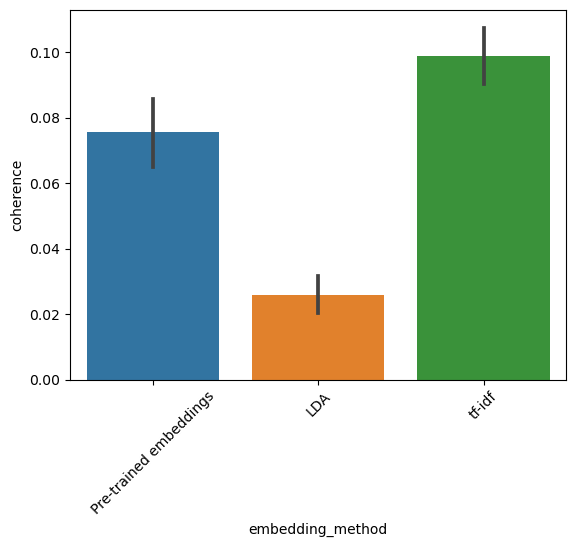

In [25]:
bargraph_dimension_value(stacked_results,"embedding_method","coherence")

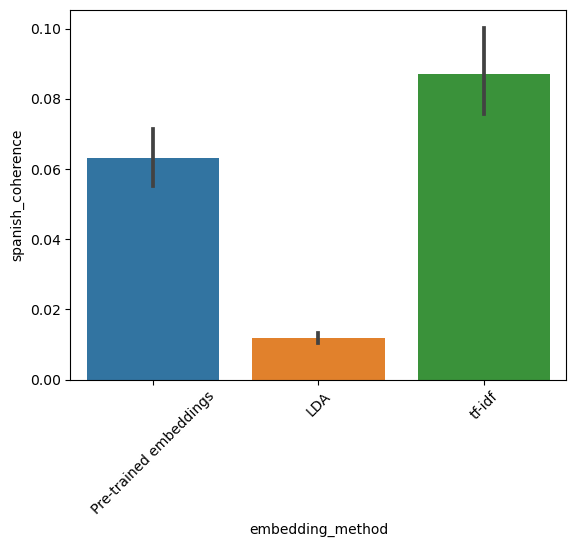

In [20]:
bargraph_dimension_value(stacked_results,"embedding_method","spanish_coherence")

We can observe that on average, tf-idf as an embedding method leads to better coherence. However, it's good to note that for this, tf-idf needs data from all language data, while pre-trained embeddings only use the english data for topic modelling.

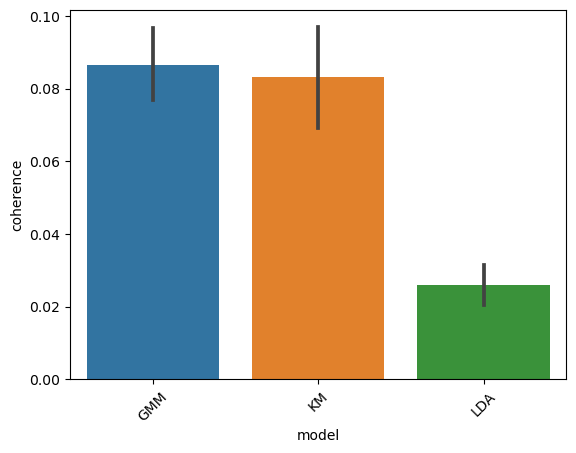

In [21]:
bargraph_dimension_value(stacked_results,"model","coherence")

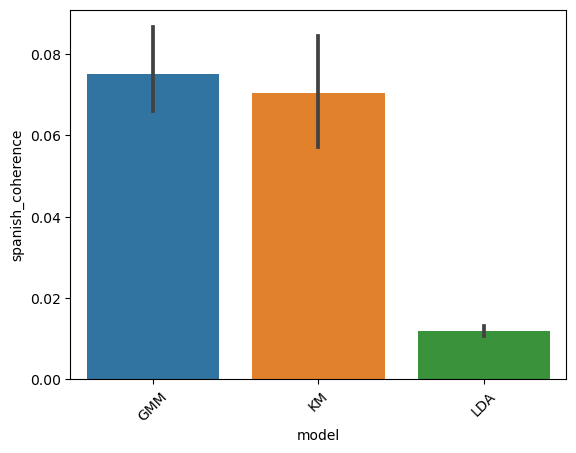

In [22]:
bargraph_dimension_value(stacked_results,"model","spanish_coherence")

The performance of a GMM vs a K-Means model is comparable, with GMM having a slightly higher edge on average.

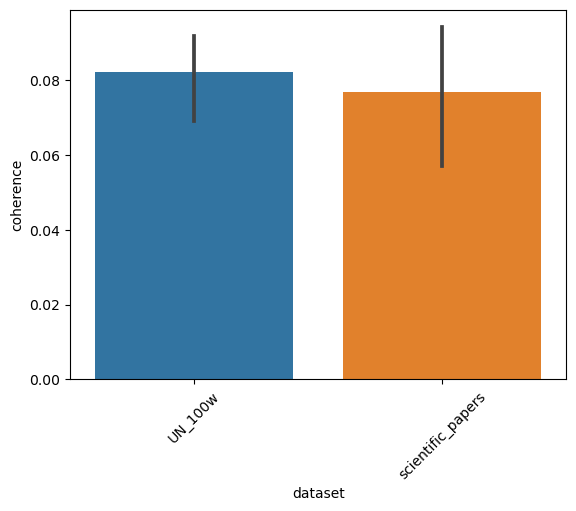

In [23]:
bargraph_dimension_value(stacked_results,"dataset","coherence")

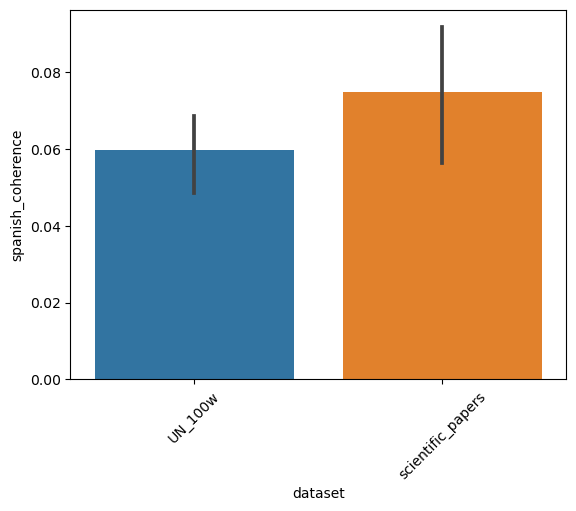

In [26]:
bargraph_dimension_value(stacked_results,"dataset","spanish_coherence")

The smaller dataset (with larger vocabulary and larger document length) received better coherence on average. It's also good to note that there's a considerable gap in coherence for the larger dataset between English and Spanish

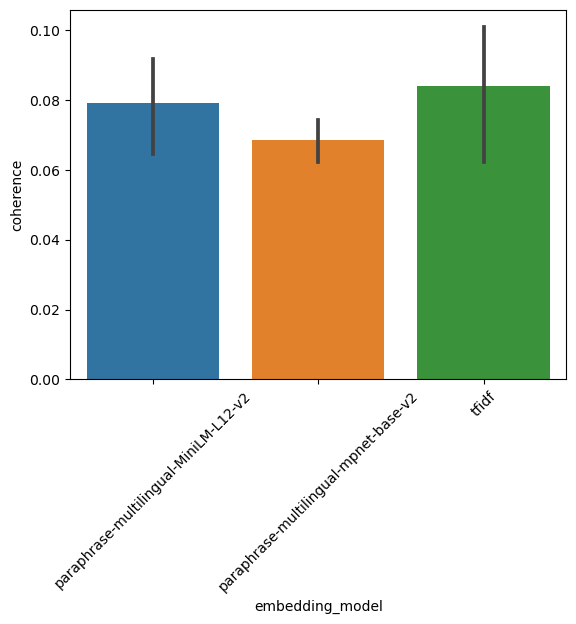

In [27]:
bargraph_dimension_value(stacked_results,"embedding_model","coherence")

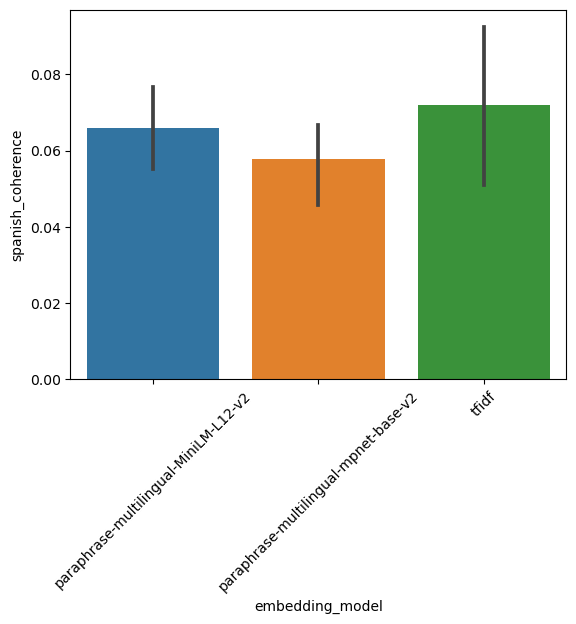

In [28]:
bargraph_dimension_value(stacked_results,"embedding_model","spanish_coherence")

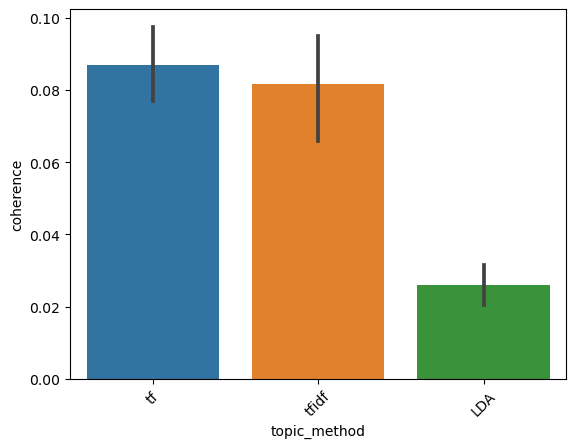

In [29]:
bargraph_dimension_value(stacked_results,"topic_method","coherence")

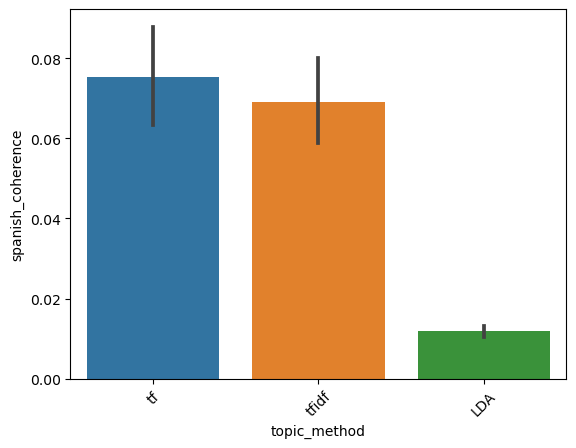

In [30]:
bargraph_dimension_value(stacked_results,"topic_method","spanish_coherence")

## Diversity

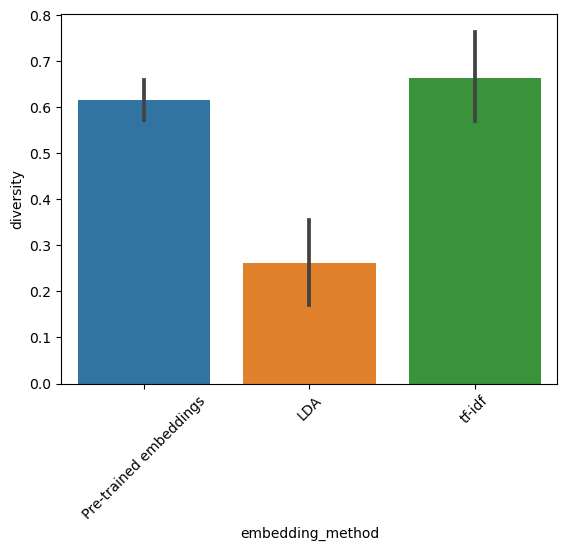

In [31]:
bargraph_dimension_value(stacked_results,"embedding_method","diversity")

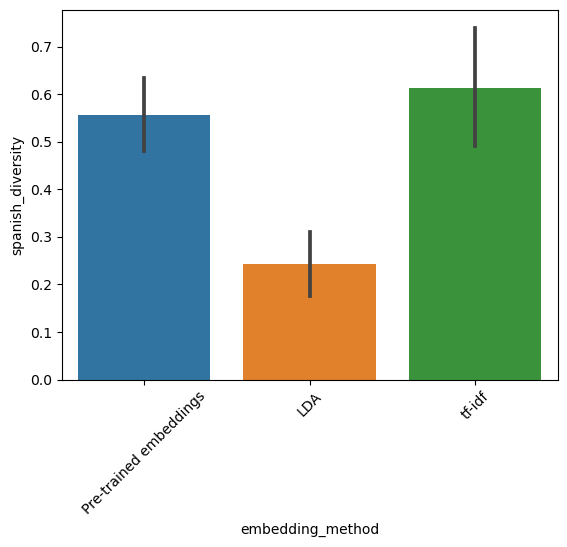

In [32]:
bargraph_dimension_value(stacked_results,"embedding_method","spanish_diversity")

Once again, TF-IDF leads to better results when it comes to diversity. Same weaknesses detailed above apply.

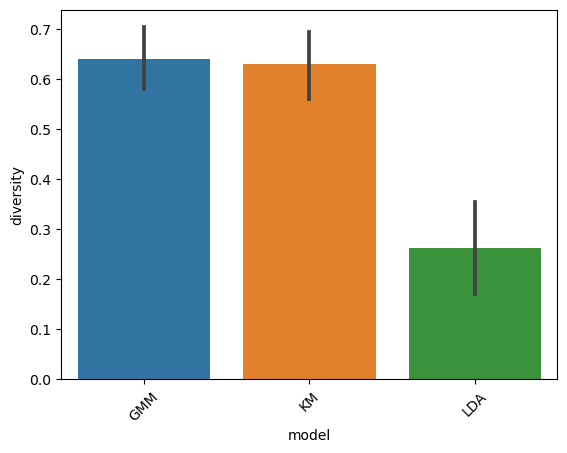

In [33]:
bargraph_dimension_value(stacked_results,"model","diversity")

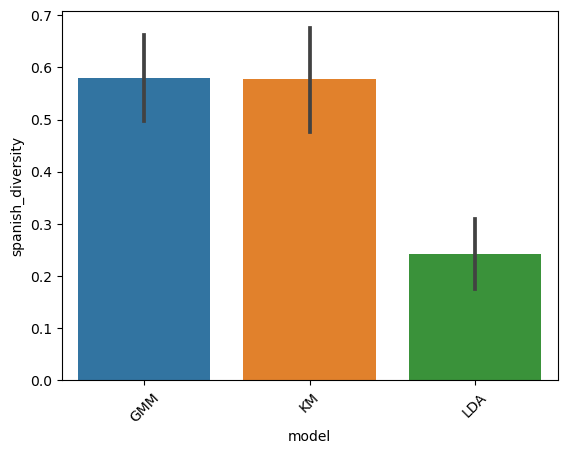

In [34]:
bargraph_dimension_value(stacked_results,"model","spanish_diversity")

On average, diversity is almost the same between a GMM and a K-Means Model.

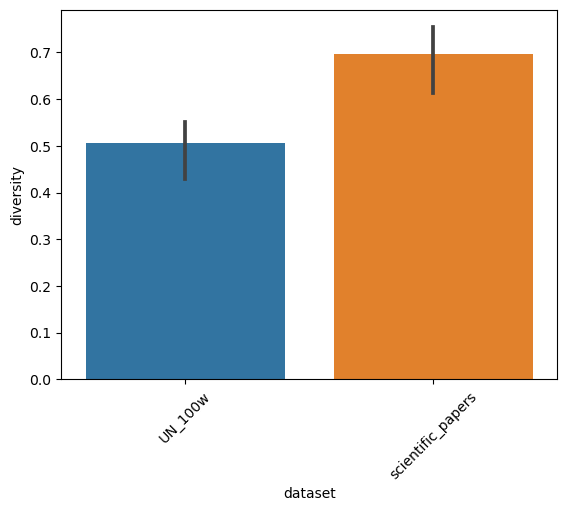

In [35]:
bargraph_dimension_value(stacked_results,"dataset","diversity")

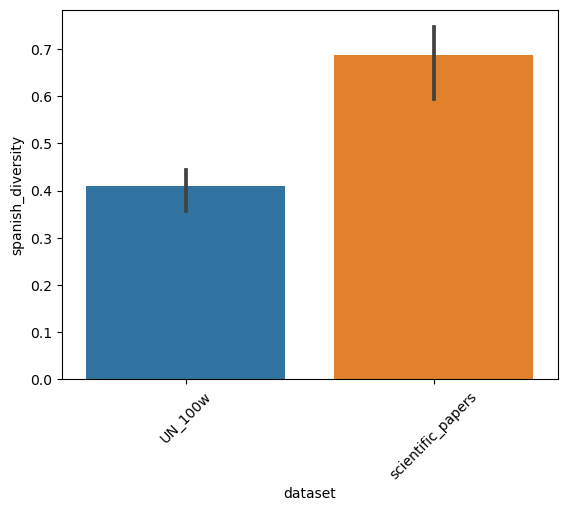

In [36]:
bargraph_dimension_value(stacked_results,"dataset","spanish_diversity")

Here we see a huge difference between the papers dataset and the UN dataset, with the papers dataset having a much higher diversity on average.

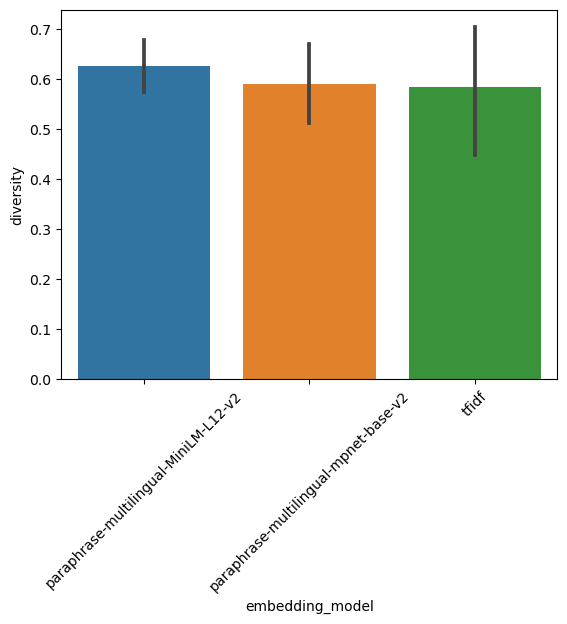

In [37]:
bargraph_dimension_value(stacked_results,"embedding_model","diversity")

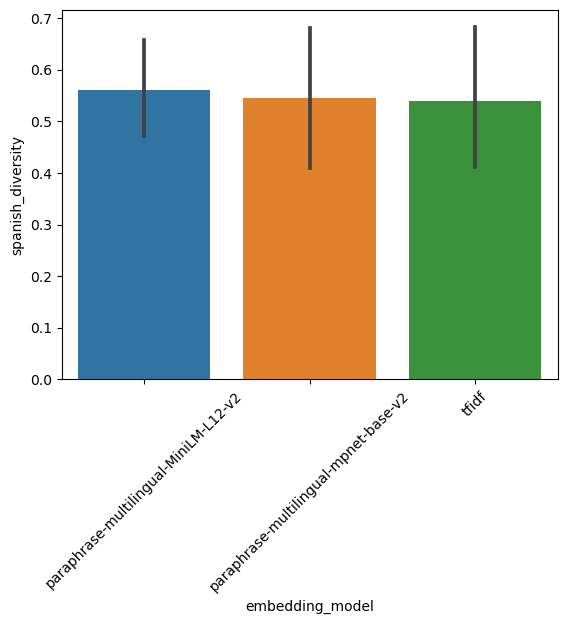

In [38]:
bargraph_dimension_value(stacked_results,"embedding_model","spanish_diversity")

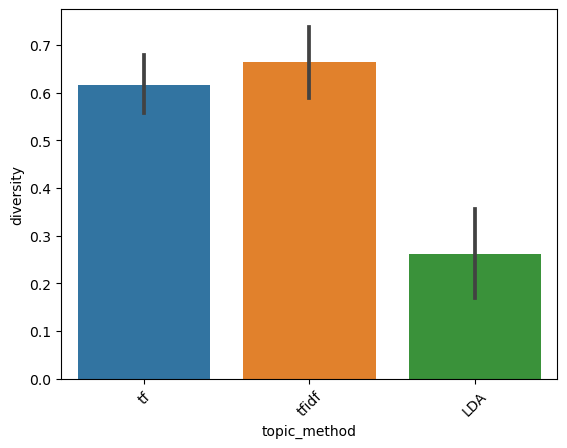

In [39]:
bargraph_dimension_value(stacked_results,"topic_method","diversity")

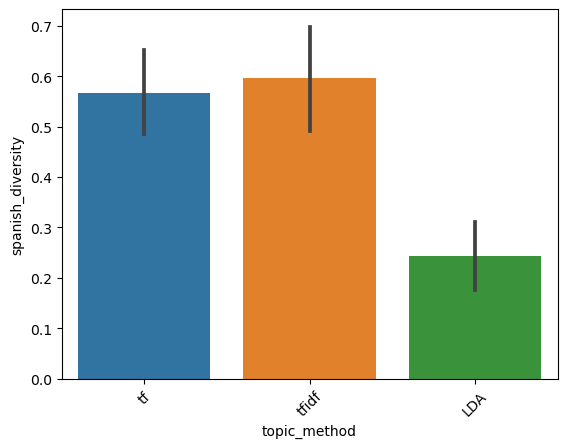

In [40]:
bargraph_dimension_value(stacked_results,"topic_method","spanish_diversity")

## Cross Lingual Alignment

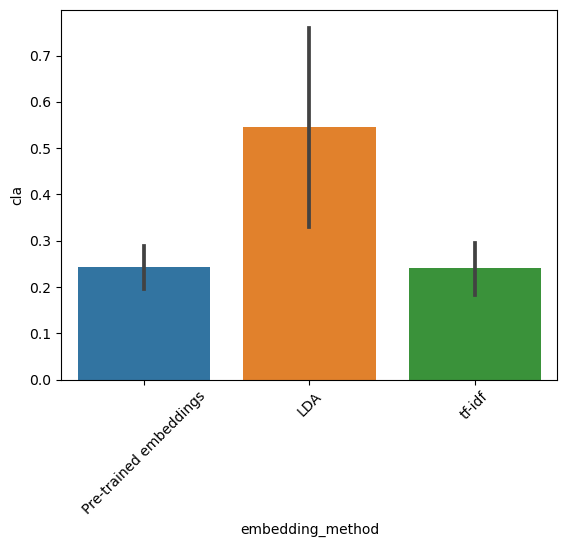

In [41]:
bargraph_dimension_value(stacked_results,"embedding_method","cla")

For Cross Lingual Alignment, pre-trained embeddings have a slight edge over tf-idf.

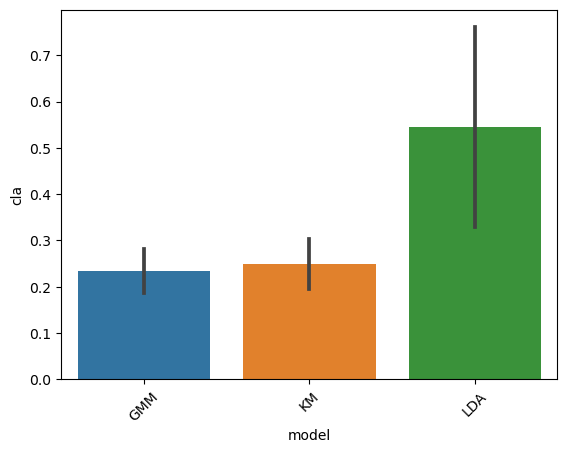

In [42]:
bargraph_dimension_value(stacked_results,"model","cla")

K-Means have a slightly higher edge over GMM when it comes to CLA

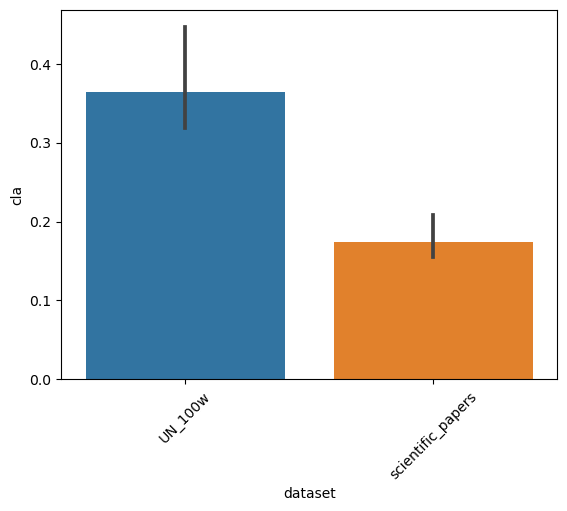

In [43]:
bargraph_dimension_value(stacked_results,"dataset","cla")

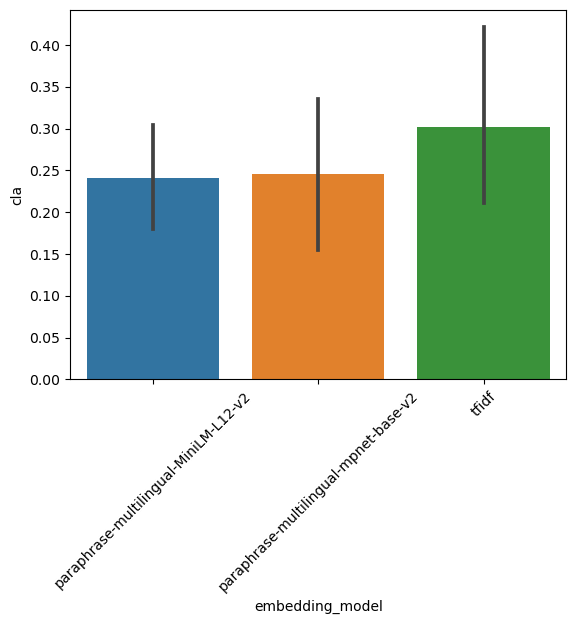

In [44]:
bargraph_dimension_value(stacked_results,"embedding_model","cla")

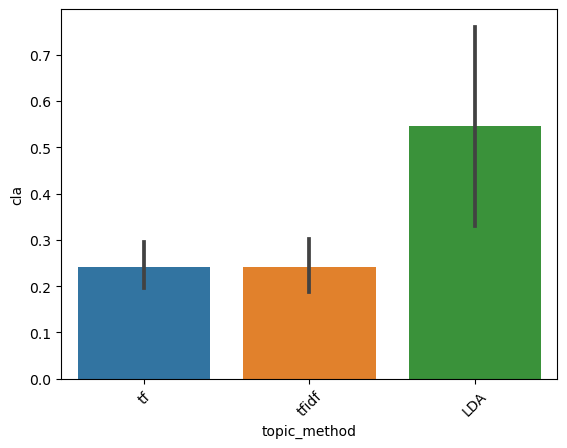

In [45]:
bargraph_dimension_value(stacked_results,"topic_method","cla")

There is a huge difference in CLA between the UN and papers dataset. This makes sense, as this metric is dependent on the entities of the datasets, with UN having a smaller vocabulary but with more examples. 

In [34]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [35]:

def compare_topics_languages(data,topic_number):
    english_text = " ".join(data["top_tokens"][topic_number])
    en_wordcloud = WordCloud(width=480, height=480).generate(english_text)

    spanish_text = " ".join(data["spanish_top_tokens"][topic_number])
    es_wordcloud = WordCloud(width=480, height=480).generate(spanish_text)

    rows = 1
    columns = 2

    fig = plt.figure(figsize=(10, 7)) 
    fig.add_subplot(rows, columns, 1) 
  
    # showing image 
    plt.imshow(en_wordcloud) 
    plt.axis('off') 
    plt.title("English Top Tokens")

    fig.add_subplot(rows, columns, 2) 
  
    plt.imshow(es_wordcloud) 
    plt.axis('off') 
    plt.title("Spanish Top Tokens")

    plt.show()

In [36]:
best_coherence = stacked_results.iloc[0]

In [37]:
best_coherence.to_frame()

,0
coherence,0.083539
top_tokens,"[[european, group, party, include, mep, irish,..."
spanish_coherence,0.061851
spanish_top_tokens,"[[grupo, europeo, partido, nombre, democrata, ..."
diversity,0.54
spanish_diversity,0.425
average_matching,1.0
cla,0.318859
dataset,UN_100w
embedding_method,Pre-trained embeddings


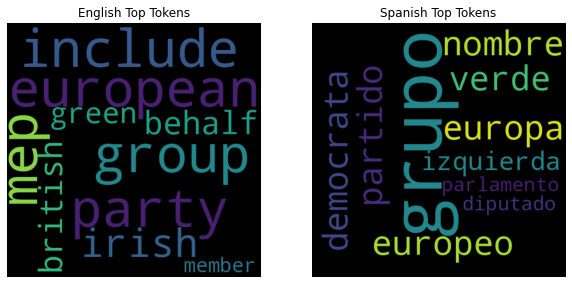

In [38]:
compare_topics_languages(best_coherence,0) 

By knowledge of both languages, we can indeed see that the top words from the topics are mostly the same! 